## How Many Deaths Per State?

By: Meghan O'Malley

In [83]:
#https://www.cdc.gov/
#The libraries I'll be using
import pandas as pd
import numpy as np
import altair as alt

pd.options.display.max_columns = 100

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn

### Read the Data

We are using pandas to read a csv file from the CDC.

In [108]:
df = pd.read_csv('https://data.cdc.gov/api/views/muzy-jte6/rows.csv?accessType=DOWNLOAD',
                 parse_dates=['Week Ending Date'])

df.head()

Jurisdiction of Occurrence  MMWR Year  MMWR Week Week Ending Date  \
0              United States       2020          1       2020-01-04   
1              United States       2020          2       2020-01-11   
2              United States       2020          3       2020-01-18   
3              United States       2020          4       2020-01-25   
4              United States       2020          5       2020-02-01   

   All Cause  Natural Cause  Septicemia (A40-A41)  \
0    60167.0        55016.0                 846.0   
1    60719.0        55732.0                 867.0   
2    59347.0        54511.0                 831.0   
3    59147.0        54399.0                 830.0   
4    58820.0        54009.0                 811.0   

   Malignant neoplasms (C00-C97)  Diabetes mellitus (E10-E14)  \
0                        11567.0                       1827.0   
1                        11962.0                       1941.0   
2                        11706.0                       1819.0   
3                        11882.0                       1861.0   
4                        11959.0                       1827.0   

   Alzheimer disease (G30)  Influenza and pneumonia (J09-J18)  \
0                   2532.0                             1560.0   
1                   2564.0                             1530.0   
2                   2490.0                             1486.0   
3                   2516.0                             1487.0   
4                   2477.0                             1419.0   

   Chronic lower respiratory diseases (J40-J47)  \
0                                        3501.0   
1                                        3708.0   
2                                        3524.0   
3                                        3397.0   
4                                        3311.0   

   Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)  \
0                                             1066.0                    
1                                             1035.0                    
2                                              991.0                    
3                                              978.0                    
4                                              980.0                    

   Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)  \
0                                             1095.0                       
1                                             1094.0                       
2                                             1123.0                       
3                                             1109.0                       
4                                             1072.0                       

   Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)  \
0                                              667.0                                                   
1                                              675.0                                                   
2                                              649.0                                                   
3                                              688.0                                                   
4                                              661.0                                                   

   Diseases of heart (I00-I09,I11,I13,I20-I51)  \
0                                      14195.0   
1                                      13903.0   
2                                      13586.0   
3                                      13602.0   
4                                      13456.0   

   Cerebrovascular diseases (I60-I69)  \
0                              3108.0   
1                              3183.0   
2                              3255.0   
3                              3179.0   
4                              3080.0   

   COVID-19 (U071, Multiple Cause of Death)  \
0                                       3.0   
1   

## Inspecting the Data

We want to be looking at the states. By doing this we are considering the unique values.

In [85]:
df['Jurisdiction of Occurrence'].value_counts().sort_index()

Alabama                 60
Alaska                  60
Arizona                 60
Arkansas                60
California              60
Colorado                60
Connecticut             60
Delaware                60
District of Columbia    60
Florida                 60
Georgia                 60
Hawaii                  60
Idaho                   60
Illinois                60
Indiana                 60
Iowa                    60
Kansas                  60
Kentucky                60
Louisiana               60
Maine                   60
Maryland                60
Massachusetts           60
Michigan                60
Minnesota               60
Mississippi             60
Missouri                60
Montana                 60
Nebraska                60
Nevada                  60
New Hampshire           60
New Jersey              60
New Mexico              60
New York                60
New York City           60
North Carolina          60
North Dakota            60
Ohio                    60
O

## Cleaning

As shown above, New York City was in the list and so was the United States. Because these are not states we will take them  out.

In [86]:
unitedStatesRows = df['Jurisdiction of Occurrence'] == 'United States'
nycRows = df['Jurisdiction of Occurrence'] == 'New York City'

goodRows = df[~unitedStatesRows & ~nycRows]
goodRows['Jurisdiction of Occurrence'].value_counts().sort_index()

Alabama                 60
Alaska                  60
Arizona                 60
Arkansas                60
California              60
Colorado                60
Connecticut             60
Delaware                60
District of Columbia    60
Florida                 60
Georgia                 60
Hawaii                  60
Idaho                   60
Illinois                60
Indiana                 60
Iowa                    60
Kansas                  60
Kentucky                60
Louisiana               60
Maine                   60
Maryland                60
Massachusetts           60
Michigan                60
Minnesota               60
Mississippi             60
Missouri                60
Montana                 60
Nebraska                60
Nevada                  60
New Hampshire           60
New Jersey              60
New Mexico              60
New York                60
North Carolina          60
North Dakota            60
Ohio                    60
Oklahoma                60
O

## Table of All Deaths Per State

In [87]:
allDeathsPerState_df = pd.pivot_table(data = goodRows,
                                  index = 'Week Ending Date',
                                  columns = 'Jurisdiction of Occurrence',
                                  values = 'All Cause'
                                 )

allDeathsPerState_df.tail()

Jurisdiction of Occurrence  Alabama  Alaska  Arizona  Arkansas  California  \
Week Ending Date                                                             
2021-01-23                   1591.0    73.0   2310.0     934.0      8724.0   
2021-01-30                   1365.0    59.0   1867.0     798.0      7288.0   
2021-02-06                   1137.0    47.0   1450.0     645.0      5591.0   
2021-02-13                    957.0    37.0   1187.0     522.0      4423.0   
2021-02-20                    708.0    30.0   1000.0     453.0      3057.0   

Jurisdiction of Occurrence  Colorado  Connecticut  Delaware  \
Week Ending Date                                              
2021-01-23                     948.0        588.0     202.0   
2021-01-30                     846.0        464.0     183.0   
2021-02-06                     662.0        258.0     152.0   
2021-02-13                     521.0         82.0     126.0   
2021-02-20                     505.0         17.0      85.0   

Jurisdiction of Occurrence  District of Columbia  Florida  Georgia  Hawaii  \
Week Ending Date                                                             
2021-01-23                                 139.0   5530.0   2498.0   197.0   
2021-01-30                                 131.0   5018.0   2070.0   207.0   
2021-02-06                                 104.0   4429.0   1742.0   193.0   
2021-02-13                                  73.0   4019.0   1265.0   207.0   
2021-02-20                                  64.0   3384.0    850.0   184.0   

Jurisdiction of Occurrence  Idaho  Illinois  Indiana   Iowa  Kansas  Kentucky  \
Week Ending Date                                                                
2021-01-23                  326.0    2545.0   1383.0  654.0   654.0    1119.0   
2021-01-30                  233.0    2405.0   1189.0  518.0   635.0     904.0   
2021-02-06                  220.0    2103.0    999.0  468.0   544.0     708.0   
2021-02-13                  208.0    1938.0    817.0  399.0   420.0     572.0   
2021-02-20                  193.0    1718.0    641.0  333.0   409.0     382.0   

Jurisdiction of Occurrence  Louisiana  Maine  Maryland  Massachusetts  \
Week Ending Date                                                        
2021-01-23                     1056.0  335.0    1330.0         1476.0   
2021-01-30                      868.0  350.0    1219.0         1259.0   
2021-02-06                      707.0  262.0    1038.0         1172.0   
2021-02-13                      535.0  269.0     947.0         1056.0   
2021-02-20                      336.0  216.0     769.0          992.0   

Jurisdiction of Occurrence  Michigan  Minnesota  Mississippi  Missouri  \
Week Ending Date                                                         
2021-01-23                    2172.0      885.0        942.0    1569.0   
2021-01-30                    1644.0      814.0        779.0    1369.0   
2021-02-06                    1537.0      669.0        655.0    1078.0   
2021-02-13                    1385.0      542.0        523.0     902.0   
2021-02-20                    1290.0      522.0        420.0     769.0   

Jurisdiction of Occurrence  Montana  Nebraska  Nevada  New Hampshire  \
Week Ending Date                                                       
2021-01-23                    229.0     379.0   769.0          292.0   
2021-01-30                    180.0     320.0   668.0          260.0   
2021-02-06                    155.0     256.0   569.0          249.0   
2021-02-13                    134.0     232.0   514.0          204.0   
2021-02-20                     97.0     198.0   373.0          203.0   

Jurisdiction of Occurrence  New Jersey  New Mexico  New York  North Carolina  \
Week Ending Date                                                               
2021-01-23                      1948.0       444.0    2934.0           133.0   
2021-01-30                      1895.0       365.0    2662.0           109.0   
2021-02-06                      1679.0  

## Visualizations

Death count by state starting in 2020. Although there are many lines we can still notice patterns in the trend lines. This is important because this graph can be compared to other years and we can see how the trends compare.

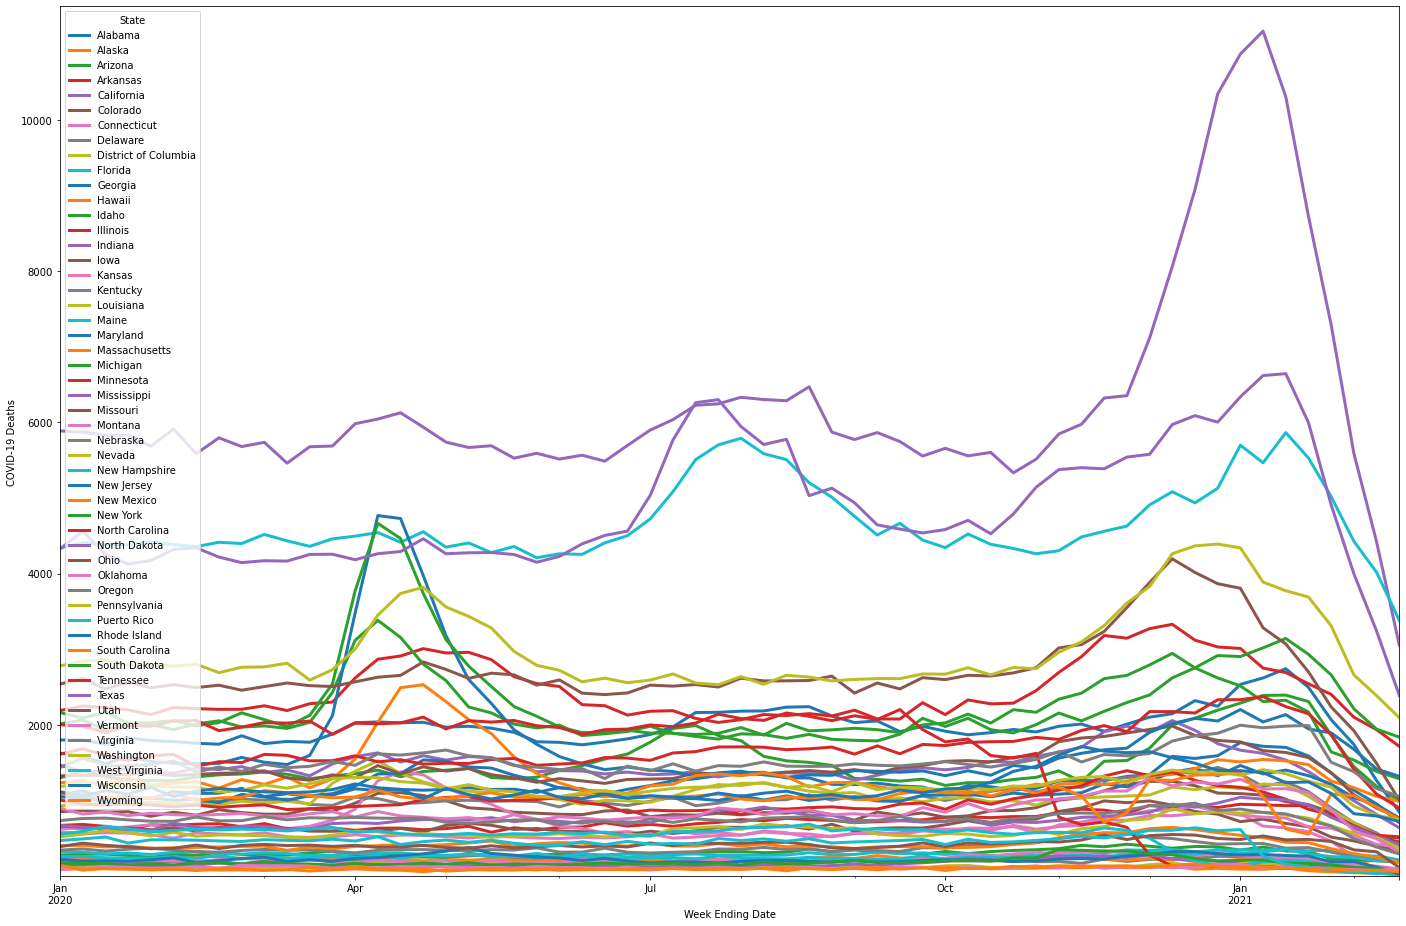

In [88]:
allStates_df = allDeathsPerState_df.loc['2020-01-01':,['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','District of Columbia','Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Puerto Rico','Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming']]

f,ax = plt.subplots(figsize=(24,16))
allStates_df.plot(ax=ax,lw=3)
ax.set_ylim((1,11500))
ax.set_ylabel('COVID-19 Deaths')
ax.legend(title='State',loc='upper left')
ax.axhline(10,c='k',ls='--',lw=1) # Suppressed counts

Because 2021 has just started there is data here. But I would just like to look at 2020...

In [89]:
allDeathsPerStateByYear_df = pd.pivot_table(data = goodRows,
                                  index = 'MMWR Year',
                                  columns = 'Jurisdiction of Occurrence',
                                  values = 'All Cause'
                                 )

allDeathsPerStateByYear_df.tail()

Jurisdiction of Occurrence      Alabama     Alaska      Arizona    Arkansas  \
MMWR Year                                                                     
2020                        1209.811321  94.792453  1475.226415  722.811321   
2021                        1311.428571  64.000000  1800.000000  747.142857   

Jurisdiction of Occurrence   California    Colorado  Connecticut    Delaware  \
MMWR Year                                                                      
2020                        6141.433962  909.962264   717.320755  207.150943   
2021                        7223.285714  791.428571   387.428571  170.142857   

Jurisdiction of Occurrence  District of Columbia      Florida      Georgia  \
MMWR Year                                                                    
2020                                  142.075472  4649.641509  1963.924528   
2021                                  117.428571  4816.142857  1970.142857   

Jurisdiction of Occurrence      Hawaii       Idaho     Illinois      Indiana  \
MMWR Year                                                                      
2020                        230.150943  314.754717  2460.018868  1496.245283   
2021                        206.142857  271.571429  2307.857143  1170.142857   

Jurisdiction of Occurrence        Iowa      Kansas     Kentucky    Louisiana  \
MMWR Year                                                                      
2020                        680.452830  595.037736  1060.943396  1076.716981   
2021                        546.571429  602.000000   874.285714   847.000000   

Jurisdiction of Occurrence       Maine     Maryland  Massachusetts  \
MMWR Year                                                            
2020                        299.075472  1141.018868    1317.773585   
2021                        305.285714  1151.428571    1289.285714   

Jurisdiction of Occurrence     Michigan   Minnesota  Mississippi     Missouri  \
MMWR Year                                                                       
2020                        2205.433962  996.716981   749.169811  1453.471698   
2021                        1809.285714  794.857143   764.142857  1283.571429   

Jurisdiction of Occurrence     Montana    Nebraska      Nevada  New Hampshire  \
MMWR Year                                                                       
2020                        229.509434  376.773585  599.188679     259.188679   
2021                        183.857143  312.857143  649.428571     269.285714   

Jurisdiction of Occurrence   New Jersey  New Mexico     New York  \
MMWR Year                                                          
2020                        1824.773585  432.641509  2283.603774   
2021                        1777.000000  357.857143  2537.142857   

Jurisdiction of Occurrence  North Carolina  North Dakota         Ohio  \
MMWR Year                                                               
2020                           1714.188679    168.905660  2749.660377   
2021                            105.714286     93.714286  2245.571429   

Jurisdiction of Occurrence    Oklahoma      Oregon  Pennsylvania  Puerto Rico  \
MMWR Year                                                                       
2020                        883.943396  769.301887   2985.735849   565.000000   
2021                        815.857143  607.428571   3116.428571   124.428571   

Jurisdiction of Occurrence  Rhode Island  South Carolina  South Dakota  \
MMWR Year                                                                
2020                          232.452830     1131.283019    193.452830   
2021                          194.857143      865.000000    144.285714   

Jurisdiction of Occurrence    Tennessee        Texas        Utah     Vermont  \
MMWR Year                                                                      
2020                        1690.264151  4840.943396  423.698113  117.943396   
2021                        1720.142857  4829.42

In [90]:
allDeathsPerStateByYear_df.drop([2021],axis=0,inplace=True)

In [91]:
allDeathsPerStateByYear_df

Jurisdiction of Occurrence      Alabama     Alaska      Arizona    Arkansas  \
MMWR Year                                                                     
2020                        1209.811321  94.792453  1475.226415  722.811321   

Jurisdiction of Occurrence   California    Colorado  Connecticut    Delaware  \
MMWR Year                                                                      
2020                        6141.433962  909.962264   717.320755  207.150943   

Jurisdiction of Occurrence  District of Columbia      Florida      Georgia  \
MMWR Year                                                                    
2020                                  142.075472  4649.641509  1963.924528   

Jurisdiction of Occurrence      Hawaii       Idaho     Illinois      Indiana  \
MMWR Year                                                                      
2020                        230.150943  314.754717  2460.018868  1496.245283   

Jurisdiction of Occurrence       Iowa      Kansas     Kentucky    Louisiana  \
MMWR Year                                                                     
2020                        680.45283  595.037736  1060.943396  1076.716981   

Jurisdiction of Occurrence       Maine     Maryland  Massachusetts  \
MMWR Year                                                            
2020                        299.075472  1141.018868    1317.773585   

Jurisdiction of Occurrence     Michigan   Minnesota  Mississippi     Missouri  \
MMWR Year                                                                       
2020                        2205.433962  996.716981   749.169811  1453.471698   

Jurisdiction of Occurrence     Montana    Nebraska      Nevada  New Hampshire  \
MMWR Year                                                                       
2020                        229.509434  376.773585  599.188679     259.188679   

Jurisdiction of Occurrence   New Jersey  New Mexico     New York  \
MMWR Year                                                          
2020                        1824.773585  432.641509  2283.603774   

Jurisdiction of Occurrence  North Carolina  North Dakota         Ohio  \
MMWR Year                                                               
2020                           1714.188679     168.90566  2749.660377   

Jurisdiction of Occurrence    Oklahoma      Oregon  Pennsylvania  Puerto Rico  \
MMWR Year                                                                       
2020                        883.943396  769.301887   2985.735849        565.0   

Jurisdiction of Occurrence  Rhode Island  South Carolina  South Dakota  \
MMWR Year                                                                
2020                           232.45283     1131.283019     193.45283   

Jurisdiction of Occurrence    Tennessee        Texas        Utah     Vermont  \
MMWR Year                                                                      
2020                        1690.264151  4840.943396  423.698113  117.943396   

Jurisdiction of Occurrence     Virginia   Washington  West Virginia  \
MMWR Year                                                             
2020                        1520.830189  1203.773585     481.924528   

Jurisdiction of Occurrence    Wisconsin     Wyoming  
MMWR Year                                            
2020                        1194.245283  106.113208

Text(0.5, 0, 'Number of deaths')

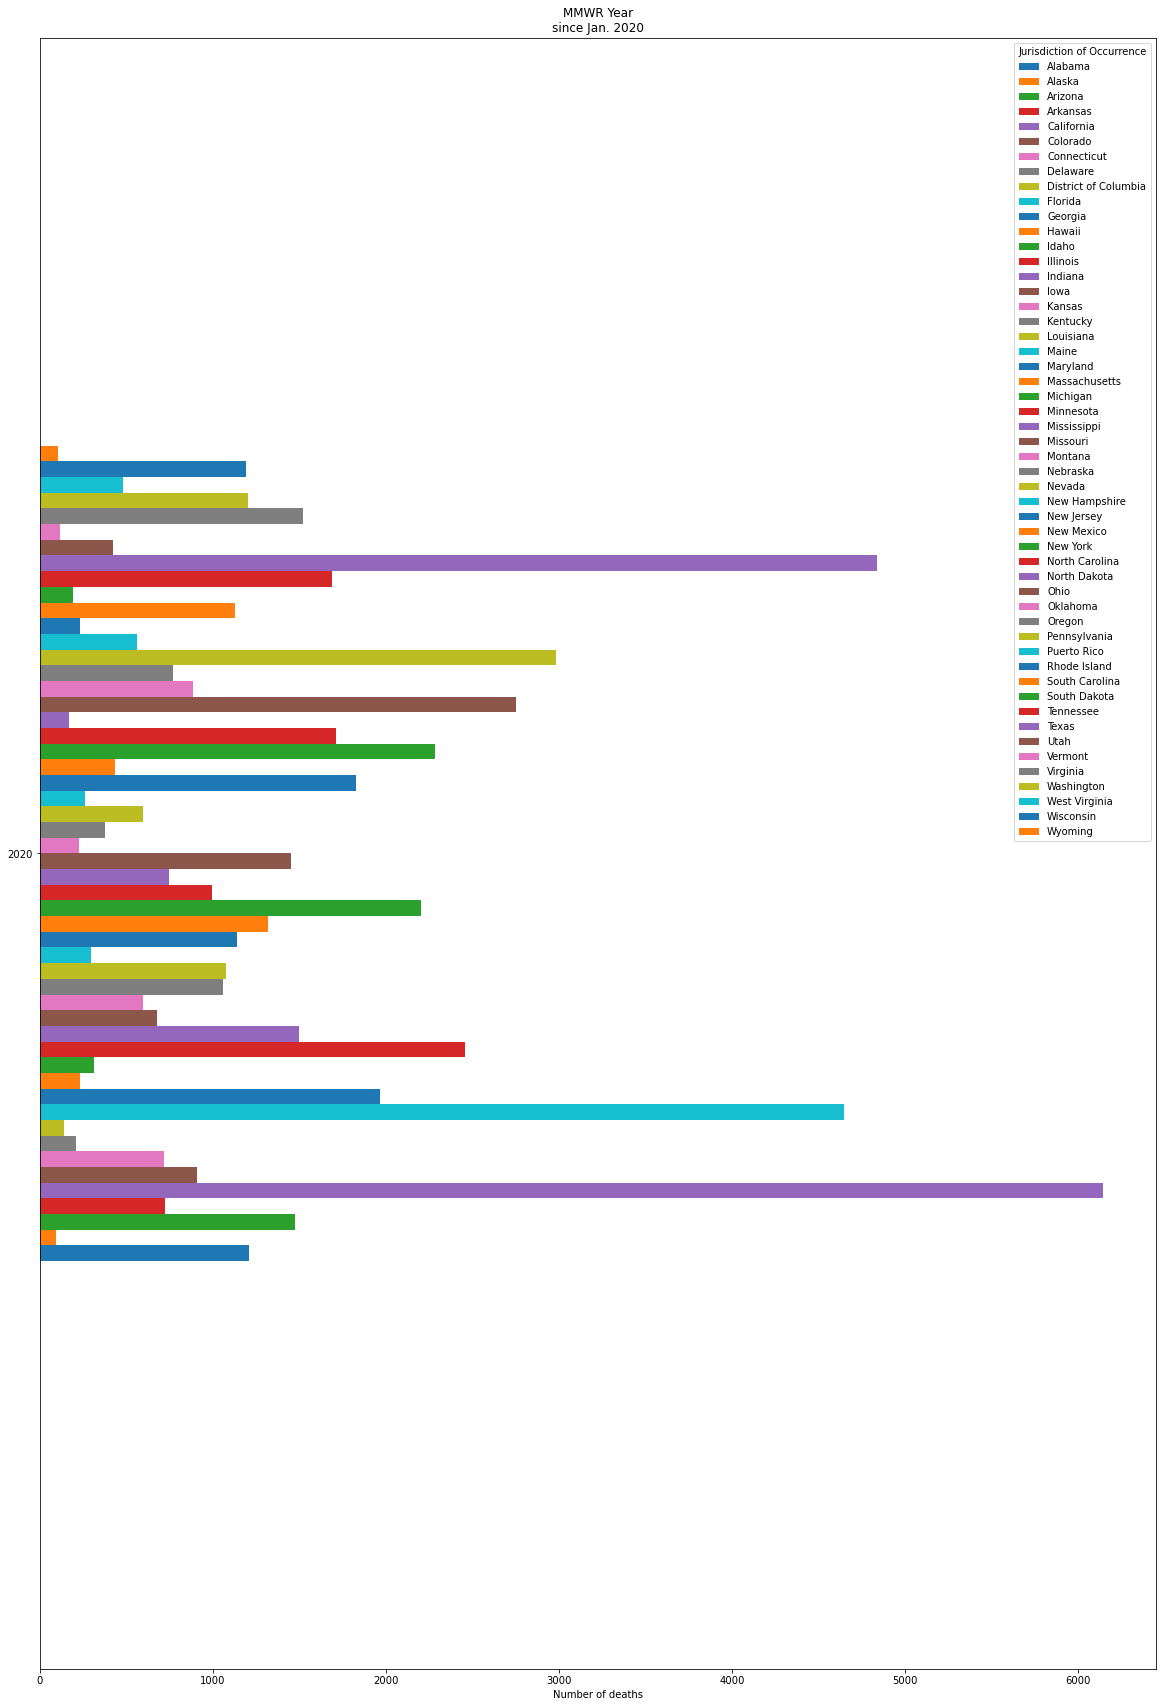

In [92]:
f,ax = plt.subplots(figsize=(20,30))
allDeathsPerStateByYear_df.plot(kind='barh',ax=ax)
ax.set_ylabel(None)
ax.set_title('MMWR Year\nsince Jan. 2020')
ax.set_xlabel('Number of deaths')

As shown above, each state has a differnt number of deaths. The bar chart is a nice way to understand that each state varries. This can we expanded by looking at other factors as well including the states population. And all this information can be compared to any COVID-19 information.

Continuing, I wanted to look at the region where I currently live. Colorado by far has had the most amount of people die in 2020, but not all states are created equal. Population is forsure a factor. This makes me wonder the difference in population amoung Utah and New Mexico. I would guess that they are pretty close based on the following graph.

In [113]:
import altair as alt
import pandas as pd

#Let's Plot States in the Mountain West Time Zone 

data = pd.DataFrame({'states': ['Colorado','Utah','New Mexico','Wyoming'],
                     'deaths': [909.962264,423.698113,432.641509,106.113208]})
alt.Chart(data).mark_bar().encode(
    x='states',
    y='deaths',
)

alt.Chart(...)

Covid-19 has made 2020 a historic year. This graph allows us to evaluate 'out of all deaths how many of those were COVID?'.

In [120]:
#this includes the US as a whole
alt.Chart(df ).mark_point().encode(
    y='COVID-19 (U071, Multiple Cause of Death)',
    x='All Cause'
)

alt.Chart(...)

Now I wanted to evaluate the two states that I live in. I can learn from the graph that Illinois has more weekly deaths than Colorado. In fact, the lowest number of deaths in Illinois is still more than the highest reported week in Colorado.

In [126]:
alt.Chart(allDeathsPerState_df).mark_point().encode(
    y='Colorado',
    x='Illinois'
)

alt.Chart(...)

Overall, I learned more about the number of deaths in America by looking at these graphs.